## 1. Gathering Data
* ### download image_prediction.tsv file using requests library
* ### use tweepy to query twitter's API

## Summary
* ### Gathering Data
    * There are three datasets I need to acquire. The “twitter-archive-enhanced.csv” and “image_prediction.tsv” files which can be directly downloaded from the Udacity website. The former contains basic tweet data for all 5000+ of their tweets, including the columns like tweet’s text, dog name, ratings, and dog “stage”. The latter is the prediction results from neural network that predicts the breed of a dog according to the dog image. It also includes columns such as tweet ID, image URL, etc. The third one cannot be downloaded directly and it needs to query the Twitter API for each tweet’s JSON data. The data was obtained through JSON package and only the retweet and favorite count information was stored in “twitter_json.txt” file.

* ### Assessing the Data
    * Once all data has been gathered, I just need pandas to read into dataframes. After exploring each dataframe, I found 8 quality issues and 2 tidiness issues that need to be addressed before moving on. First, since we’re only interested in the original ratings, we don’t need to worry about the retweet information. Therefore, we only keep the rows where the retweet status id column is a missing value. Second, there are a lot of missing values in the columns of ‘in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' and these columns are not helpful for further analysis, so I dropped these columns. 
    * In addition, there are several issues with the dog “stage” columns. For example, some of the conflicting stages are labeled for the same dog like “doggo” and “pupper”. So I took a closer look at the rows with two “stages” labeled and check the dog image to see if the labels are consistent with the image. After that, I probably don’t need four separate columns for the stages and can combine them into one column. Moreover, there are issues found for the ratings columns. 
    * According to the project description, all denominators should be 10, but in the rating_denominator column not all values are 10. And in the rating_numerator column there are values obviously non-sense such as 960, 666, 1776, etc. In the dog’s name column, I also found names that don’t make any sense, e.g., a, the, this, etc. The last quality issue I identified was the one in image_prediction table. Since only p1 classification has the highest probability confidence, this the only classification I kept eventually. The two tidiness issues I found were the three separate tables should be combined into one.

* ### Cleaning the data
    * Once all issues have been identified and listed above, I went step-by-step to fix all the issues. Since we only need rows that have prediction results, during table joining, the image prediction table was left joined with twitter table on tweet ID. Then the resultant dataframe was inner join with the tweet archive table on tweet ID as well. Finally, the cleaned dataframe was saved as a csv file called “twitter_archive_master.csv”.

* ### Ratings of the dog at different stages, from pupper, puppo, to doggo, and if the dog is a floofer
    * The first figure plots the rating numerator versus dog stage. Since the rating denominator is always 10, by only comparing the numerator we’ll have an idea which stage of dogs would get highest ratings. According to this figure, it can be seen that puppos and floofers are the most popular dogs on twitter, and the doggos have the second highest ratings. Puppers have the lowest ratings. However, the ratings of all stage-dogs are all above 10, suggesting that people mostly love the dogs posted in the tweet.

* ### Ratings of dogs with different breeds
    * The second figure is a bar plot that displays the rating numerators of different dog breeds. Since there are too many dog breeds in the datasets and it’s hard to shown them all in one figure, I only listed out the 10 mostly posted breeds. Among these 10 breeds, pembrokes, samoyeds, chows, and golden_retrivers receive the highest ratings, while pugs have lowest rating.

* ### For top 10 rated dogs, the number of favorite counts with different dog breed (the third figure)
    * Furthermore, I changed my focus to the favorite counts instead of the dog ratings and filtered the ten highest ratings of dogs. After that, I plotted the favorite counts versus the dog breed among the top 10 rated-dogs in a bar chart as shown below. Apparently, there are a couple of features that was not cleaned in the wrangling step such as web_site and home_theater. If we only observe the bars of dogs, it is easily to conclude that the standard poodles are most favorable, while the least favorite breed is the Pembroke. 

In [191]:
import requests
import tweepy
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb') as file:
    file.write(response.content)

In [4]:
# create a tweepy api object
consumer_key = 'BHO2Me2TMW44VgB8YtDM8LwCb'
consumer_secret = 'D0mxRV87R9j6nsC0qHwoegMnViHwg1BvK5fdC4uedJ5s0RTAzm'
access_token = '261465150-ZTGyLGlqLgekUGE4DdXxWow6cq8U1gjS28E4ja4H'
access_secret = 'ppcF275feixyuU0MKplwopbGigVfz4SxPJgapWcLvjmbs'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
# get the tweet ids and store it to tweet_id var for use later to query twitter API
tweet_id = df_archive.tweet_id.values
len(tweet_id)

2356

In [8]:
# query twitter api with specified tweet ids and save data to tweet_json.txt
start = time.time()
fail_id = {}
with open('tweet_json.txt','w') as file:   
    for i in tweet_id:
        try:
            tweet = api.get_status(i,tweet_mode='extended')            
            json.dump(tweet._json,file)
            file.write('\n')
            print('Sucess!')
        except tweepy.TweepError as e:
            print('Failed.')
            fail_id[i] = e
            pass
end = time.time()
print(end-start)
print(fail_id)

Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Failed.
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Failed.
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Failed.
Sucess!
Sucess!
Failed.
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Failed.
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!
Sucess!


## 2. Assess the data
* ### Read data into dataframes
* ### Identify data quality issues

In [153]:
# read twitter-archive-enhanced.csv to dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv',parse_dates=['timestamp'])
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [86]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [4]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1152,725786712245440512,NaN,NaN,2016-04-28 20:40:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lillie. She's a Rutabagan Floofem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725786712...,11,10,Lillie,None,None,pupper,None
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None
438,820013781606658049,NaN,NaN,2017-01-13 21:04:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [5]:
df_archive.retweeted_status_id.isnull().all()

False

In [6]:
df_archive.sort_values(by='timestamp',ascending=False).head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_archive.query('doggo=="doggo" & floofer=="floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [8]:
df_archive.query('doggo=="doggo" & pupper=="pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [9]:
df_archive.query('doggo=="doggo" & puppo=="puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [10]:
df_archive.query('pupper=="pupper" & puppo=="puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
df_archive.query('puppo=="puppo" & floofer=="floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
df_archive.query('pupper=="pupper" & floofer=="floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
df_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [26]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [32]:
df_archive.name.value_counts()[df_archive.name.value_counts()>4]

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
Buddy        7
an           7
Daisy        7
Bailey       7
Toby         7
Koda         6
Rusty        6
Scout        6
Bella        6
Jax          6
Dave         6
Jack         6
Milo         6
Stanley      6
Oscar        6
Leo          6
Bentley      5
Oakley       5
Gus          5
Chester      5
Sammy        5
Larry        5
George       5
very         5
Sunny        5
Finn         5
Alfie        5
Phil         5
Louis        5
Name: name, dtype: int64

In [13]:
# read image prediction file into dataframe
df_img = pd.read_csv('image_prediction.tsv',sep='\t')

In [14]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_list = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append({'tweet_id':data['id'],
                        'retweet_count':data['retweet_count'],
                        'favorite_count':data['favorite_count']})
df_tweet = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count']) 

In [17]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7716,36243
1,892177421306343426,5701,31264
2,891815181378084864,3780,23536
3,891689557279858688,7877,39541
4,891327558926688256,8486,37763


In [18]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


#### Quality Issues
1. `twitter-archive` table
    * only need original ratings, so no retweets where retweeted_status_id is NA, drop rows that have retweets
    * columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' have too many null values and they don't add much information. So after filter the original ratings, these can be dropped. 
    * there are some rows that classify the same dog as both doggo and pupper, doggo and puppo, doggo and fluffer. These should be corrected and consistent with the dog appearance in the photo. 
    * After the above correction, the dog types columns should be combine into one column
    * rating should always have a denominator of 10
    * the numerator of rating should be a reasonable value, values like 420/75/80/24/26/44/50/60/165/84/88/144/182/143/666/960/1776/27/45/99/121/204 are apparentely not
    * the dog's names also need to be corrected, some of the names are obviously wrong, e.g. a/the/an/very/this
2. `image prediction` table
    * the p1 classification has the highest probability confidence, so only keep the p1 predictions 

#### Tidiness Issues
* There are only 2075 rows in the `prediction` table which is less than the rows in the `tweeter archive` table, so do a right join to `prediction` table on `tweet id`
* `tweet` table also has more rows than the `prediction` table, so do a left join to `prediction` table on `tweet id`

## 3. Clean the issues of the data identified in the last section
* ### Quality Issues

In [154]:
# filter the retweet rows
df_archive = df_archive[df_archive.retweeted_status_id.isna()]
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
325,833863086058651648,NaN,NaN,2017-02-21 02:17:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. Hairbrushes are his favorite ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833863086...,12,10,Bentley,None,None,None,None
1632,684460069371654144,NaN,NaN,2016-01-05 19:42:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He's a Western Sagittarius Dookm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684460069...,10,10,Jeph,None,None,None,None
915,757354760399941633,NaN,NaN,2016-07-24 23:20:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/757354760...,8,10,Devón,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [155]:
# drop columns of retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df_archive.drop(columns=['retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

In [156]:
# picture url of the dog with both doggo and floofer
df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & floofer=="floofer"').tweet_id.values[0]].jpg_url
# not that floof, so delet this description
df_archive.loc[df_archive.query('doggo=="doggo" & floofer=="floofer"').index[0],'floofer'] = 'None'

In [157]:
# index 0 - no photo, 3 - only pupper, 4 - not a dog, 5- no img prediction, 7 - only a doggo 
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[0]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[1]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[2]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[3]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[4]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[5]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[6]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[7]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[8]].jpg_url)
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.values[9]].jpg_url)
idx_noimg = df_archive.query('doggo=="doggo" & pupper=="pupper"').index[0]
idx_pupper = df_archive.query('doggo=="doggo" & pupper=="pupper"').index[3]
drop_nodog = df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.index[4]
drop_nopred = df_archive.query('doggo=="doggo" & pupper=="pupper"').tweet_id.index[5]
idx_doggo = df_archive.query('doggo=="doggo" & pupper=="pupper"').index[7]
df_archive.loc[idx_noimg,'doggo'] = 'None'
df_archive.loc[idx_noimg,'pupper'] = 'None'
df_archive.loc[idx_pupper,'doggo'] = 'None'
df_archive.loc[idx_doggo,'pupper'] = 'None'
df_archive.drop(index=[drop_nodog,drop_nopred],inplace=True)

1707    https://pbs.twimg.com/ext_tw_video_thumb/81777...
Name: jpg_url, dtype: object
1644    https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg
Name: jpg_url, dtype: object
1616    https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg
Name: jpg_url, dtype: object
1609    https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg
Name: jpg_url, dtype: object
1507    https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg
Name: jpg_url, dtype: object
Series([], Name: jpg_url, dtype: object)
1350    https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg
Name: jpg_url, dtype: object
1292    https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg
Name: jpg_url, dtype: object
1201    https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
Name: jpg_url, dtype: object
1155    https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
Name: jpg_url, dtype: object


In [158]:
# just puppo in the photo
print(df_img[df_img.tweet_id==df_archive.query('doggo=="doggo" & puppo=="puppo"').tweet_id.values[0]].jpg_url)
df_archive.loc[df_archive.query('doggo=="doggo" & puppo=="puppo"').index[0],'doggo'] = 'None'

1919    https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg
Name: jpg_url, dtype: object


In [169]:
# combine the size of the dog into one column
df_archive['size'] = np.nan
for s in ['doggo','floofer','pupper','puppo']:
    df_archive.loc[df_archive.index[df_archive[s] == 'None'],s] = np.nan
for s in ['doggo','floofer','pupper','puppo']:
    df_archive['size'].fillna(df_archive[s],inplace = True)
df_archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,size
540,806542213899489280,2016-12-07 16:53:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,https://twitter.com/dog_rates/status/806542213...,11,10,Waffles,NaN,NaN,NaN,NaN,NaN
1727,679877062409191424,2015-12-24 04:11:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,NaN,NaN,NaN,NaN,NaN
534,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,NaN,NaN,NaN,NaN
1747,679111216690831360,2015-12-22 01:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,https://twitter.com/dog_rates/status/679111216...,12,10,officially,NaN,NaN,NaN,NaN,NaN
1486,693109034023534592,2016-01-29 16:30:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Thank you friend that was a swell petting"" 11...",https://twitter.com/dog_rates/status/693109034...,11,10,None,NaN,NaN,NaN,NaN,NaN


In [170]:
df_archive['size'].value_counts()

pupper     225
doggo       82
puppo       25
floofer      9
Name: size, dtype: int64

In [171]:
# for photos that have both doggo and pupper in it, update the size column
df_archive.loc[df_archive.query('doggo=="doggo" & pupper=="pupper"').index,'size'] = 'doggo, pupper'

In [172]:
df_archive.query('doggo=="doggo" & pupper=="pupper"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,size
531,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,NaN,pupper,NaN,"doggo, pupper"
565,802265048156610565,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,NaN,pupper,NaN,"doggo, pupper"
889,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN,"doggo, pupper"
1063,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN,"doggo, pupper"
1113,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,NaN,pupper,NaN,"doggo, pupper"


In [173]:
# correct the rating denominator all to 10
df_archive.rating_denominator = 10
df_archive.rating_denominator.value_counts()

10    2173
Name: rating_denominator, dtype: int64

In [174]:
# delete rows when the rating numerator is greater than 20
df_archive = df_archive[df_archive.rating_numerator <= 20]

In [175]:
# delete rows with non-sense names
df_archive.drop(index=df_archive.index[df_archive.name.isin(['a','the','an','very','this'])],inplace=True)
df_archive.sample(5)

C:\Users\kekes\Anaconda3\envs\bertelsmann_data\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,size
174,858107933456039936,2017-04-28 23:57:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,NaN,NaN,NaN,NaN,NaN
1524,690597161306841088,2016-01-22 18:09:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,NaN,NaN,NaN,NaN,NaN
1449,696100768806522880,2016-02-06 22:38:50+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This poor pupper has been stuck in a vortex si...,https://vine.co/v/i1KWj0vbvA9,10,10,None,NaN,NaN,pupper,NaN,pupper
1333,705442520700944385,2016-03-03 17:19:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,NaN,NaN,NaN,NaN,NaN
2115,670428280563085312,2015-11-28 02:25:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Willy. He's millennial af. 11/10 https...,https://twitter.com/dog_rates/status/670428280...,11,10,Willy,NaN,NaN,NaN,NaN,NaN


In [176]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2078 non-null   int64              
 1   timestamp           2078 non-null   datetime64[ns, UTC]
 2   source              2078 non-null   object             
 3   text                2078 non-null   object             
 4   expanded_urls       2024 non-null   object             
 5   rating_numerator    2078 non-null   int64              
 6   rating_denominator  2078 non-null   int64              
 7   name                2078 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             9 non-null      object             
 10  pupper              223 non-null    object             
 11  puppo               25 non-null     object             
 12  size                334 non-null  

In [132]:
# only keep the p1 prediction columns: 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog'
df_img = df_img[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']]

In [177]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


* ### Tidiness Issues

In [178]:
# df_img left join df_tweet on tweet_id
df = df_img.merge(df_tweet,how='left',on='tweet_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   int64  
 1   jpg_url         2075 non-null   object 
 2   img_num         2075 non-null   int64  
 3   p1              2075 non-null   object 
 4   p1_conf         2075 non-null   float64
 5   p1_dog          2075 non-null   bool   
 6   retweet_count   2059 non-null   float64
 7   favorite_count  2059 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 131.7+ KB


In [179]:
# df_archive inner join df on tweet_id
df = df_archive.merge(df,on='tweet_id')
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,size,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
1367,679111216690831360,2015-12-22 01:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,https://twitter.com/dog_rates/status/679111216...,12,10,officially,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,2552.0,5918.0
943,711008018775851008,2016-03-19 01:54:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,NaN,NaN,pupper,NaN,pupper,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,1,French_bulldog,0.731405,True,611.0,2985.0
888,719332531645071360,2016-04-11 01:13:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,944.0,3409.0
295,825829644528148480,2017-01-29 22:15:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great_Pyrenees,0.853407,True,2519.0,12868.0
1031,703611486317502464,2016-02-27 16:03:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's experiencing the pupper equ...,https://twitter.com/dog_rates/status/703611486...,10,10,Scooter,NaN,NaN,pupper,NaN,pupper,https://pbs.twimg.com/media/CcO66OjXEAASXmH.jpg,1,Pembroke,0.756441,True,1523.0,3841.0


In [180]:
# drop doggo, floofer, pupper, puppo columns
df.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1902
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1903 non-null   int64              
 1   timestamp           1903 non-null   datetime64[ns, UTC]
 2   source              1903 non-null   object             
 3   text                1903 non-null   object             
 4   expanded_urls       1903 non-null   object             
 5   rating_numerator    1903 non-null   int64              
 6   rating_denominator  1903 non-null   int64              
 7   name                1903 non-null   object             
 8   size                297 non-null    object             
 9   jpg_url             1903 non-null   object             
 10  img_num             1903 non-null   int64              
 11  p1                  1903 non-null   object             
 12  p1_conf             1903 non-null 

* ### Store the cleaned dataframe df in `twitter_archive_master.csv` file

In [181]:
df.to_csv('twitter_archive_master.csv',index=False)

## 4. Data Visualization

In [209]:
df.p1.value_counts()[:10]

golden_retriever      134
Labrador_retriever     89
Pembroke               85
Chihuahua              77
pug                    52
chow                   39
Samoyed                38
Pomeranian             35
toy_poodle             34
malamute               28
Name: p1, dtype: int64

In [183]:
df['size'].value_counts()

pupper           197
doggo             65
puppo             23
floofer            7
doggo, pupper      5
Name: size, dtype: int64

In [184]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
count,1.903000e+03,1903.000000,1903.0,1903.000000,1903.000000,1896.000000,1896.000000
mean,7.376626e+17,10.590646,10.0,1.207042,0.593433,2508.703586,8487.705169
std,6.789467e+16,2.170943,0.0,0.564655,0.273291,4463.777008,12356.470387
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,11.000000,70.000000
25%,6.766051e+17,10.000000,10.0,1.000000,0.359106,565.750000,1886.500000
50%,7.101532e+17,11.000000,10.0,1.000000,0.587342,1218.500000,3839.500000
75%,7.911498e+17,12.000000,10.0,1.000000,0.847827,2865.250000,10596.000000
max,8.924206e+17,14.000000,10.0,4.000000,1.000000,77892.000000,156366.000000


In [186]:
df.groupby('size').rating_numerator.mean()

size
doggo            11.769231
doggo, pupper    11.800000
floofer          12.000000
pupper           10.629442
puppo            12.043478
Name: rating_numerator, dtype: float64

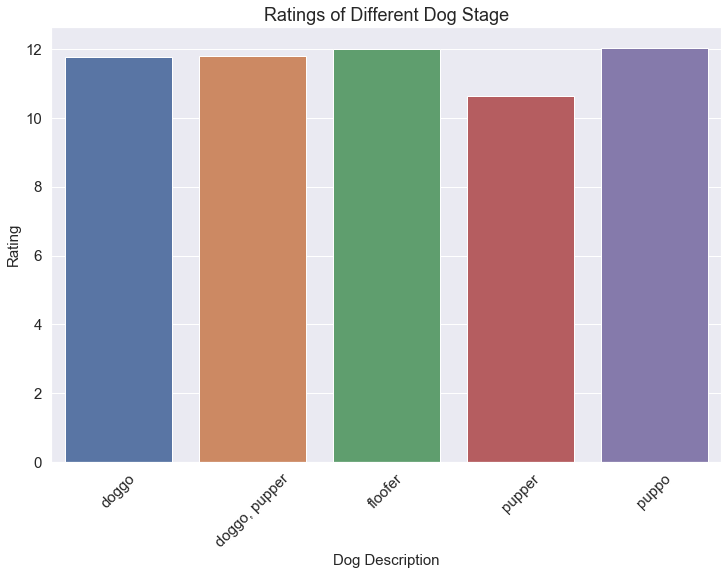

In [243]:
# plot rating numerator based on different dog size/character
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=df.groupby('size').rating_numerator.mean().index, y=df.groupby('size').rating_numerator.mean().values,figure=fig,ax=ax)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.xlabel('Dog Description',size=15)
plt.ylabel('Rating',size=15)
plt.title('Ratings of Different Dog Stage',size=18);

* ### From the barplot, it can be seen that puppo and floofer are most popular dogs on twitter, and the doggo has the second highest ratings. Pupper has lowest ratings, but they are all above 10.

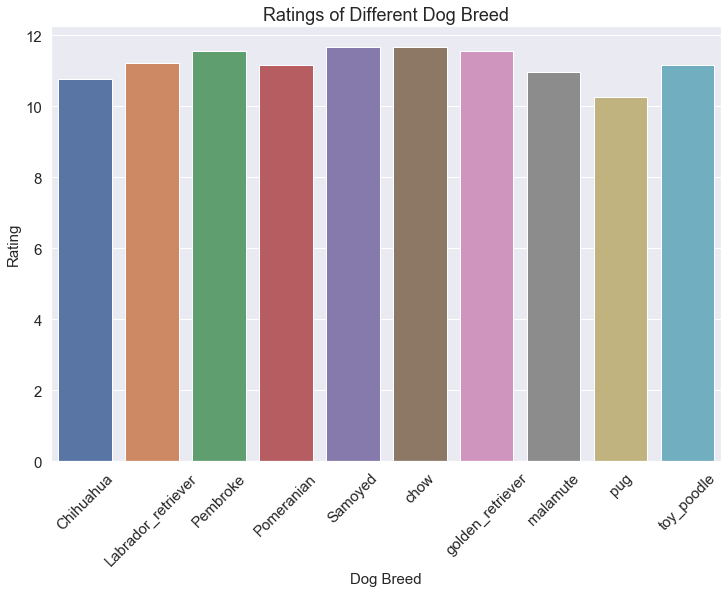

In [241]:
# bar plot of dog ratings according to the dog breed
df_p1 = df[df.p1.isin(df.p1.value_counts()[:10].index)]
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=df_p1.groupby('p1').rating_numerator.mean().index,y=df_p1.groupby('p1').rating_numerator.mean(),figure=fig)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.xlabel('Dog Breed',size=15)
plt.ylabel('Rating', size=15)
plt.title('Ratings of Different Dog Breed',size=18);

* ### This figure indicate that pembroke, samoyed, chow, and golden_retriver are most popular dog breeds, while pug has lowest rating. These are only for top 10 posted dog breeds, the ratings are all above 10.

In [236]:
# ratings less than 10
df[(df.rating_numerator < 10) & (df.rating_numerator > 8)].p1.value_counts()

pug                 7
Chihuahua           7
toy_poodle          5
golden_retriever    5
French_bulldog      4
                   ..
picket_fence        1
hamster             1
sliding_door        1
fire_engine         1
whippet             1
Name: p1, Length: 91, dtype: int64

In [226]:
df.sort_values(by='rating_numerator')[:10].p1.value_counts()

coho             1
scorpion         1
electric_fan     1
paper_towel      1
swing            1
seat_belt        1
traffic_light    1
hen              1
lacewing         1
Angora           1
Name: p1, dtype: int64

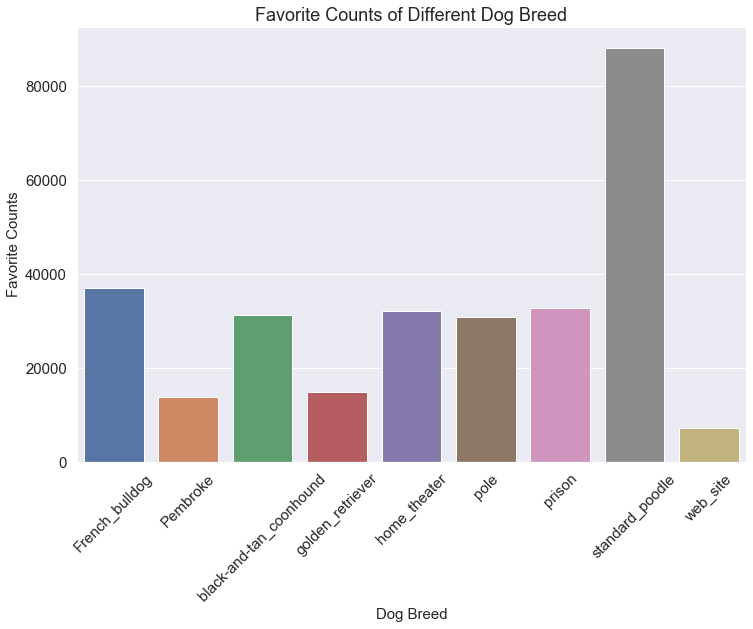

In [242]:
df_high = df.sort_values(by='rating_numerator',ascending=False)[:10]
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=df_high.groupby('p1').favorite_count.mean().index, y=df_high.groupby('p1').favorite_count.mean(),figure=fig)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.xlabel('Dog Breed',size=15)
plt.ylabel('Favorite Counts', size=15)
plt.title('Favorite Counts of Different Dog Breed',size=18);

* ### Among the top 10 ratings of tweets, the highest favorite counts are standard poodles, while the least favorite breed is pembroke. 